Автор материала: Зраев Артем.

Можно использовать в каких угодно целях.

<b> В задании нужно загрузить датасет с данными оттока и ответить на несколько вопросов (написать код). При этом сам датасет уже есть и его необязательно качать с репозитория</b>

Цель задания: проверить базовые навыки работы студентов с Pandas, умение проводить такой же базовый EDA (exploratory data analysis), делать feature engineering и обучать и валидировать модель.

Список столбцов с типами данных в датасете:

- customerID           object
- gender               object
- SeniorCitizen         int64
- Partner              object
- Dependents           object
- tenure                int64
- PhoneService         object
- MultipleLines        object
- InternetService      object
- OnlineSecurity       object
- OnlineBackup         object
- DeviceProtection     object
- TechSupport          object
- StreamingTV          object
- StreamingMovies      object
- Contract             object
- PaperlessBilling     object
- PaymentMethod        object
- MonthlyCharges      float64
- TotalCharges         object
- Churn                object

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd  # Библиотека для работы с данными в формате DataFrame
import numpy as np  # Библиотека для работы с числами и массивами
from sklearn.pipeline import Pipeline, make_pipeline  # Модули для создания и использования пайплайнов
from sklearn.base import BaseEstimator, TransformerMixin  # Базовые классы для создания собственных трансформаторов
from sklearn.linear_model import LogisticRegression  # Модель логистической регрессии
from sklearn.model_selection import train_test_split  # Модуль для разделения данных на обучающую и тестовую выборки
from sklearn.pipeline import FeatureUnion  # Модуль для объединения различных этапов обработки данных
from sklearn.ensemble import RandomForestClassifier  # Модель случайного леса
from sklearn.model_selection import train_test_split  # Повторное импортирование модуля для разделения данных
from sklearn.preprocessing import StandardScaler  # Модуль для стандартизации данных
from sklearn.metrics import roc_auc_score, log_loss  # Метрики для оценки качества модели
from sklearn.metrics import roc_curve, auc  # Инструменты для построения ROC-кривой
import itertools  # Модуль для работы с итераторами и комбинаторными функциями
import dill  # Библиотека для сериализации и десериализации объектов Python

import matplotlib.pyplot as plt  # Библиотека для построения графиков

%config InlineBackend.figure_format = 'svg'  # Устанавливаем формат вывода графиков в SVG


In [2]:
DATA_PATH = "./Data/WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Считываем CSV-файл с данными и сохраняем его в переменной "df" 
df = pd.read_csv(DATA_PATH)

# Выводим первые строки из "df" для ознакомления с данными
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Выводим общую информацию о DataFrame "df", включая количество записей, типы данных и использование памяти
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Создаем сводную статистику для числовых столбцов в DataFrame
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
# Создаем сводную статистику для столбцов с типом данных "object" (строковых данных) в DataFrame "df"
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [6]:
# Создаем серию булевых значений, где True означает, что запись является дубликатом
duplicates = df.duplicated()

# Считаем количество уникальных значений в серии булевых значений, чтобы узнать количество дубликатов и
# уникальных записей
duplicates.value_counts()


False    7043
dtype: int64

In [7]:
# Создаем булевую матрицу, где True означает, что значение в соответствующей ячейке является пропущенным
is_missing = df.isna()

# Суммируем количество True (пропущенных значений) для каждого столбца, чтобы узнать общее количество пропущенных значений в каждом столбце
missing_counts = is_missing.sum()

# Выводим результат, который покажет количество пропущенных значений в каждом столбце
missing_counts

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### 1. Какое соотношение мужчин и женщин в представленном наборе данных?

In [8]:
#Ваш код здесь

# Получаем количество уникальных значений и их относительную частоту в столбце 'gender'
male, female = df['gender'].value_counts(normalize=True)

# Выводим информацию о соотношении мужчин и женщин, округляя проценты до двух знаков после запятой
print(f'Cоотношение мужчин и женщин следующее:\nмужчины - {round(male * 100, 2)}%\
\nженщины - {round(female * 100, 2)}%')

Cоотношение мужчин и женщин следующее:
мужчины - 50.48%
женщины - 49.52%


##### 2. Какое количество уникальных значений у поля InternetService?

In [9]:
#Ваш код здесь

# Получаем количество уникальных значений в столбце 'InternetService'
df['InternetService'].nunique()

3

##### 3. Выведите статистики по полю TotalCharges (median, mean, std).

In [10]:
#Ваш код здесь

# Выводим описательную статистику для столбца 'TotalCharges'
df['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

В чем странность того, что вы получили? (подсказка: смотреть нужно на тип данных)

##### 4. Сделайте замену значений поля PhoneService  на числовые (Yes->1, No->0)

In [11]:
#Ваш код здесь

# Заменяем значения в столбце 'PhoneService' с помощью словаря, где 'Yes' заменяется на 1, а 'No' на 0
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})

In [12]:
# Подсчет количества значений 
df['PhoneService'].value_counts()

1    6361
0     682
Name: PhoneService, dtype: int64

##### 5. Сделайте замену пробелов в поле TotalCharges на np.nan и приведите поле к типу данных float32. Затем заполните оставшиеся пропуски значением 0 с помощью метода fillna у столбца. Снова выведите статистики и сравните с тем, что вы видели в вопросе 3

In [13]:
#Ваш код здесь

# Проверяем, равно ли хотя бы одно значение в каждой строке пробелу (' ')
df.eq(' ').any(axis=1).value_counts()

False    7032
True       11
dtype: int64

In [14]:
# Заменяем все значения в столбце 'TotalCharges', которые равны пробелу (' '), на пропущенные значения (NaN)
df['TotalCharges'].replace(' ', np.nan, inplace=True)

In [15]:
# Преобразуем столбец 'TotalCharges' в числовой формат (тип данных float)
df['TotalCharges'] = df['TotalCharges'].astype('float32')

# Заполняем пропущенные значения в столбце 'TotalCharges' нулями
df['TotalCharges'].fillna(0, inplace=True)

In [16]:
# Выводим описательную статистику для столбца 'TotalCharges'
df['TotalCharges'].describe()

count    7043.000000
mean     2279.734375
std      2266.794434
min         0.000000
25%       398.549988
50%      1394.550049
75%      3786.599976
max      8684.799805
Name: TotalCharges, dtype: float64

##### 6. Сделайте замену значений поля Churn на числовые (Yes -> 1, No - 0)

In [17]:
#Ваш код здесь

# Заменяем значения в столбце 'Churn' с помощью словаря, где 'Yes' заменяется на 1, а 'No' на 0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

##### 7. Сделайте замену значений полей StreamingMovies, StreamingTV, TechSupport  на числовые (Yes -> 1, No -> 0, No internet service->0)

In [18]:
#Ваш код здесь

# Создаем словарь для замены значений по ключу
replacement_dict = {'Yes': 1, 'No': 0, 'No internet service': 0}

# Производим замену значений по ключу
df[['StreamingMovies', 'StreamingTV', 'TechSupport']] = \
df[['StreamingMovies', 'StreamingTV', 'TechSupport']].applymap(lambda x: replacement_dict.get(x, x))

##### 8. Заполните пропуски в поле PhoneService значением 0

In [19]:
#Ваш код здесь

# Заполняем пропущенные значения в столбце 'PhoneService' нулями
df['PhoneService'].fillna(0, inplace=True)

#### 8. Для нашего датасета оставьте только указанный ниже список полей, удалив все другие и выведите верхние 3 строки

In [20]:
column_names = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 
           'StreamingMovies', 'StreamingTV', 'TechSupport', 'Churn']

#Ваш код здесь

# Создаем новый DataFrame "df", включающий только выбранные столбцы (column_names)
df = df[column_names]

# Выводим первые 3 строки нового DataFrame для ознакомления с данными
df.head(3)

,gender,tenure,PhoneService,TotalCharges,StreamingMovies,StreamingTV,TechSupport,Churn
0,Female,1,0,29.850000,0,0,0,0
1,Male,34,1,1889.500000,0,0,0,0
2,Male,2,1,108.150002,0,0,0,1


##### 9. Разделите датасет на тренировочную и тестовую выборку (подсказка - воспользуйтесь train_test_split из sklearn.model_selection. Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [21]:
# Задаем список признаков, которые будут использоваться для обучения модели
features = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 'StreamingMovies', 'StreamingTV', 'TechSupport']

# Задаем целевую переменную (целевой признак)
target = 'Churn'

# Выделяем признаки (X) и целевую переменную (y)
X = df[features]
y = df[target]

# Разбиваем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.30, random_state=21)



##### 10. соберите pipeline для поля gender (нужно разобраться и изучить https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html ) из классов ColumnSelector и OHEEncoder, которые уже написаны ниже заранее

In [22]:

# Класс ColumnSelector выбирает указанный столбец из DataFrame.
class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer для выбора указанного столбца из DataFrame.
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        """
        Метод fit не выполняет никаких действий и просто возвращает объект.
        """
        return self

    def transform(self, X):
        """
        Метод transform возвращает DataFrame, содержащий только выбранный столбец.
        """
        return X[self.key]

# Класс NumberSelector выбирает указанный столбец и возвращает его в виде DataFrame.
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer для выбора указанного столбца из DataFrame и возврата его в виде DataFrame.
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        """
        Метод fit не выполняет никаких действий и просто возвращает объект.
        """
        return self

    def transform(self, X):
        """
        Метод transform возвращает DataFrame, содержащий только выбранный столбец.
        """
        return X[[self.key]]

# Класс OHEEncoder (One-Hot Encoding Encoder) выполняет one-hot encoding для категориальных признаков.
class OHEEncoder(BaseEstimator, TransformerMixin):
    """
    Transformer для выполнения one-hot encoding категориальных признаков.
    """
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        """
        Метод fit определяет столбцы, созданные при one-hot encoding, и сохраняет их.
        """
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        """
        Метод transform применяет one-hot encoding и добавляет отсутствующие столбцы со значением 0.
        """
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in test_columns:
            if col_ not in self.columns:
                X[col_] = 0
        return X[self.columns]
    
    
# Создание пайплайна "gender" для обработки столбца 'gender'.
gender = Pipeline([
                ('selector', ColumnSelector(key='gender')), # Выбираем столбец 'gender'
                ('ohe', OHEEncoder(key='gender')) # Применяем one-hot encoding к столбцу 'gender'
            ])


##### 11. Вызовите метод fit_transform у пайплайна gender и передайте туда нашу тренировочную выборку (пример по ссылке из документации https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline.fit)

In [23]:
#Ваш код здесь


# Применяем пайплайн "gender" к обучающему набору данных X_train.
gender.fit_transform(X_train)

,gender_Female,gender_Male
1576,1,0
5013,0,1
4077,1,0
3294,1,0
3459,1,0
...,...,...
6512,0,1
48,0,1
772,1,0
5944,0,1


##### 12. Здесь код писать уже не нужно (все сделано за вас). К полю tenure применяем StandardScaler (нормируем и центрируем). Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
Вопрос - в каких случаях это может быть полезно?

In [24]:


# Создаем пайплайн "tenure" для обработки столбца 'tenure':
tenure = Pipeline([
    ('selector', NumberSelector(key='tenure')), # Выбор столбца 'tenure'
    ('standard', StandardScaler()) # Применение стандартизации данных (StandardScaler) к столбцу 'tenure'
])


##### 13. Напишите аналогичный (как для tenure) преобразователь поля TotalCharges

In [25]:
#Ваш код здесь


# Создаем пайплайн "TotalCharges" для обработки столбца 'TotalCharges':
TotalCharges = Pipeline([
    ('selector', NumberSelector(key='TotalCharges')), # Выбор столбца 'TotalCharges'
    ('standard', StandardScaler()) # Применение стандартизации данных (StandardScaler) к столбцу 'TotalCharges'
])


Объединение всех "кубиков" очень легко сделать таким образом

In [26]:


# Создаем пайплайн "number_features" для выбора нескольких столбцов из DataFrame:
number_features = Pipeline([
    ('selector', ColumnSelector(key=['PhoneService', 'StreamingMovies', 'StreamingTV', 'TechSupport']))
])


In [27]:
# Создаем список этапов обработки данных (пайплайнов), которые будут объединены.
# Каждый этап обработки представлен кортежем ('имя этапа', пайплайн)
feats = FeatureUnion([
    ('tenure', tenure),  # Обработка столбца 'tenure' с использованием пайплайна "tenure"
    ('TotalCharges', TotalCharges),  # Обработка столбца 'TotalCharges' с использованием пайплайна "TotalCharges"
    ('continuos_features', number_features),  # Обработка нескольких столбцов с использованием пайплайна "number_features"
    ('gender', gender)  # Обработка столбца 'gender' с использованием пайплайна "gender"
])

# Создаем пайплайн для обработки всех признаков (features).
feature_processing = Pipeline([
    ('features', feats)  # Обработка всех признаков с использованием объединенного списка этапов (feats)
])


На этом этапе что мы сделали:
1. написали преобразователь поля gender, который делает OHE кодирование
2. написали преобразователь для поля tenure, который нормирует и центрирует его 
3. повторили п. 2 для поля TotalCharges
3. для всех остальных просто взяли признаки как они есть, без изменений

У нас уже готов наш пайплайн, который преобразовывает признаки. Давайте обучим модель поверх него. В качестве модели возьмем RandomForestClassifier

In [28]:

# Создаем общий пайплайн для обработки признаков и обучения модели:
pipeline = Pipeline([
    ('features', feats),  # Этап обработки признаков с использованием объединенных этапов (feats)
    ('classifier', RandomForestClassifier(random_state=42))  # Обучение модели с использованием RandomForestClassifier
])

# Обучаем пайплайн на обучающих данных (X_train и y_train):
pipeline.fit(X_train, y_train)


Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('tenure',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='tenure')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('TotalCharges',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='TotalCharges')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('continuos_features',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnSelector(key=['PhoneService',
                                                                                      'StreamingMovies',
                                                                                      'StreamingTV',
                                                                                      'TechSupport']))])),
                                                ('gender',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnSelector(key='gender')),
                                                                 ('ohe',
                                                                  OHEEncoder(key='gender'))]))])),
                ('classifier', RandomForestClassifier(random_state=42))])

##### 14. Сделайте прогноз вероятности оттока для X_test с помощью нашего предобученного на предыдущем шаге пайплайна и убедитесь что вам возвращаются вероятности для 2 классов

In [29]:
#Ваш код здесь

# Получаем классы, на которые обучалась модель (в данном случае, бинарные классы)
classes = pipeline.classes_

# Выполняем предсказание вероятностей принадлежности к классам для тестового набора данных
preds = pipeline.predict_proba(X_test)

# Извлекаем вероятности принадлежности к классу "1" (второму классу)
# preds[:, 1] возвращает вероятности для второго класса (если 0 и 1 - это классы, где 1 - это второй класс)
probabilities_class_1 = preds[:, 1]

# Выводим количество классов
print(classes)

[0 1]


##### 15. Посчитайте метрики качества получившейся модели (roc_auc, logloss)

In [30]:
#Ваш код здесь

# Вычисляем ROC AUC - площадь под ROC-кривой для оценки качества модели
roc_auc = roc_auc_score(y_test, preds[:, 1])
print(f"ROC AUC: {roc_auc}")

# Вычисляем Log Loss - логарифмическую функцию потерь для оценки качества модели
logloss = log_loss(y_test, preds[:, 1])
print(f"Log Loss: {logloss}")


ROC AUC: 0.7680649101378468
Log Loss: 0.8588058528506739


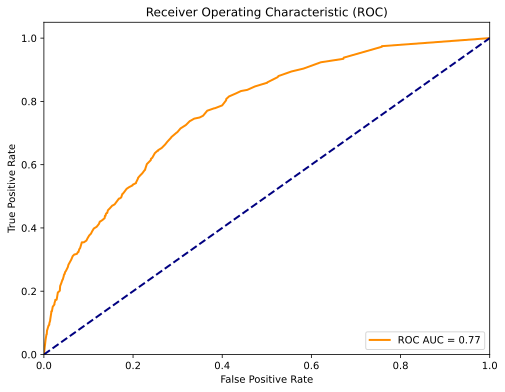

In [31]:
# Вычисляем ROC-кривую и площадь под ней для ROC AUC
fpr, tpr, _ = roc_curve(y_test, preds[:, 1])
roc_auc = auc(fpr, tpr)

# Создаем ROC AUC-график
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

# Выводим ROC AUC на графике
plt.show()

### Сохраним наш пайплайн

In [32]:
# Импортируем библиотеку для работы с файлами
import os

# Указываем путь к папке, в которой вы хотите сохранить файл
folder_path = "./model_RF"

# Проверяем существование папки
if not os.path.exists(folder_path):
    os.makedirs(folder_path)  # Создаем папку, если она не существует

# Сохраняем предобученный пайплайн (включая модель RandomForestClassifier) в файл "model_RF.dill"
with open(os.path.join(folder_path, "model_RF.dill"), "wb") as f:
    dill.dump(pipeline, f)